In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn import preprocessing
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVR

In [2]:
#read excel using pandas
ls_df = pd.read_excel(r"C:\Users\abhiram\OneDrive - Oklahoma A and M System\Oklahoma State University\GRA\Water quality monitoring\GRDA\Grand lake\GRDA_Grand_reorganized.xlsx")

In [3]:
#Gives info about entire dataframe
ls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Reservoir                                        2840 non-null   object        
 1   Site ID                                          2840 non-null   object        
 2   Lat                                              2840 non-null   float64       
 3   Long                                             2840 non-null   float64       
 4   Sampling Date                                    2840 non-null   datetime64[ns]
 5   Chlo-a (µg/L)                                    2835 non-null   float64       
 6   Turbidity                                        2709 non-null   float64       
 7   Coastal Aerosol (B1)-(0.43-0.45 µm)              2826 non-null   float64       
 8   Blue (B2)-(0.45-0.51 µm)              

In [4]:
#checking the null values in the dataframe
ls_df.isnull().sum()

Reservoir                                          6110
Site ID                                            6110
Lat                                                6110
Long                                               6110
Sampling Date                                      6110
Chlo-a (µg/L)                                      6115
Turbidity                                          6241
Coastal Aerosol (B1)-(0.43-0.45 µm)                6124
Blue (B2)-(0.45-0.51 µm)                           6124
Green (B3)-(0.53-0.59 µm)                          6124
Red (B4)-(0.64-0.67 µm)                            6124
NIR (B5)-(0.85-0.88 µm)                            6124
SWIR1 (B6)-(1.57-1.65 µm)                          6124
SWIR2 (B7)-(2.11-2.29 µm)                          6124
Panchromatic (B8)-(0.5-0.68 µm)                    6124
Cirrus (B9)-(1.36-1.38 µm)                         6124
Thermal Infrared (TIRS) 1 (B10)-(10.6-11.19 µm)    6124
Thermal Infrared (TIRS) 2 (B11)-(11.5-12.51 µm) 

In [5]:
#Drop null values if there are any
ls_df.dropna(inplace = True)
#After dropping null values checking the dataframe again
ls_df.isnull().sum()

Reservoir                                          0
Site ID                                            0
Lat                                                0
Long                                               0
Sampling Date                                      0
Chlo-a (µg/L)                                      0
Turbidity                                          0
Coastal Aerosol (B1)-(0.43-0.45 µm)                0
Blue (B2)-(0.45-0.51 µm)                           0
Green (B3)-(0.53-0.59 µm)                          0
Red (B4)-(0.64-0.67 µm)                            0
NIR (B5)-(0.85-0.88 µm)                            0
SWIR1 (B6)-(1.57-1.65 µm)                          0
SWIR2 (B7)-(2.11-2.29 µm)                          0
Panchromatic (B8)-(0.5-0.68 µm)                    0
Cirrus (B9)-(1.36-1.38 µm)                         0
Thermal Infrared (TIRS) 1 (B10)-(10.6-11.19 µm)    0
Thermal Infrared (TIRS) 2 (B11)-(11.5-12.51 µm)    0
dtype: int64

In [6]:
#creating a new dataframe to drop columns
dc = pd.DataFrame()

#dropped unnencessary columns for regression
dc = ls_df.drop(columns = ["Reservoir","Site ID", "Lat", "Long", "Sampling Date"], axis = 1)

dc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2707 entries, 0 to 2713
Data columns (total 13 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Chlo-a (µg/L)                                    2707 non-null   float64
 1   Turbidity                                        2707 non-null   float64
 2   Coastal Aerosol (B1)-(0.43-0.45 µm)              2707 non-null   float64
 3   Blue (B2)-(0.45-0.51 µm)                         2707 non-null   float64
 4   Green (B3)-(0.53-0.59 µm)                        2707 non-null   float64
 5   Red (B4)-(0.64-0.67 µm)                          2707 non-null   float64
 6   NIR (B5)-(0.85-0.88 µm)                          2707 non-null   float64
 7   SWIR1 (B6)-(1.57-1.65 µm)                        2707 non-null   float64
 8   SWIR2 (B7)-(2.11-2.29 µm)                        2707 non-null   float64
 9   Panchromatic (B8)-(0.5-0.68 µm

In [7]:
dc = dc.where(dc["Chlo-a (µg/L)"] > 0)
dc = dc.where(dc["Turbidity"] > 0)
dc = dc.where(dc["Coastal Aerosol (B1)-(0.43-0.45 µm)"] < 20000)

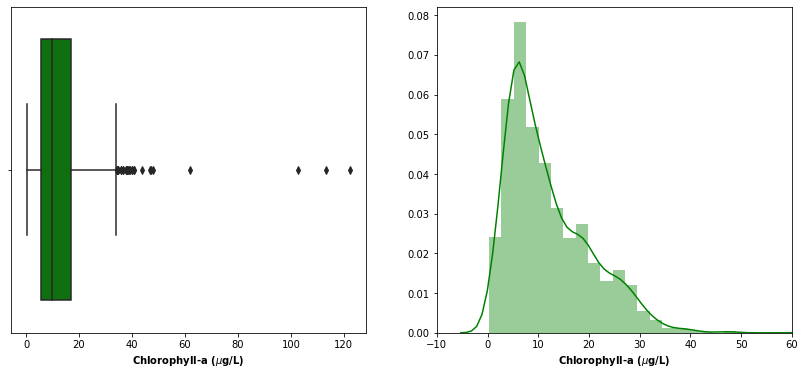

In [8]:
#chlorphyll distribution plot 
plt.figure(figsize = (14,6))
plt.subplot(121)
ax1 = sns.boxplot(dc["Chlo-a (µg/L)"], color = "g")
plt.subplot(122)
ax2 = sns.distplot(dc["Chlo-a (µg/L)"], bins=50, color = 'g')
ax2.set_xlim(-10,60)
ax1.set_xlabel("Chlorophyll-a ($\mu$g/L)", fontweight = "bold")
ax2.set_xlabel("Chlorophyll-a ($\mu$g/L)", fontweight = "bold")
plt.savefig("algae_dist.tif", dpi = 300)
#plt.show()

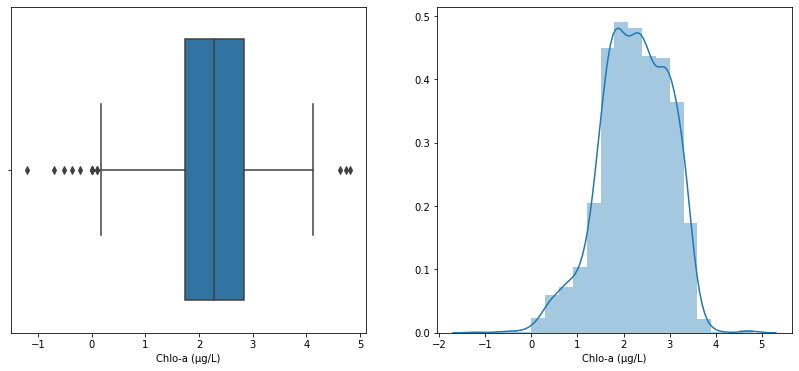

In [9]:
#chlorphyll distribution plot 
plt.figure(figsize = (14,6))
plt.subplot(121)
sns.boxplot(np.log(dc["Chlo-a (µg/L)"]))
plt.subplot(122)
sns.distplot(np.log(dc["Chlo-a (µg/L)"]), bins=20)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023DC35EAA48>,
      dtype=object)

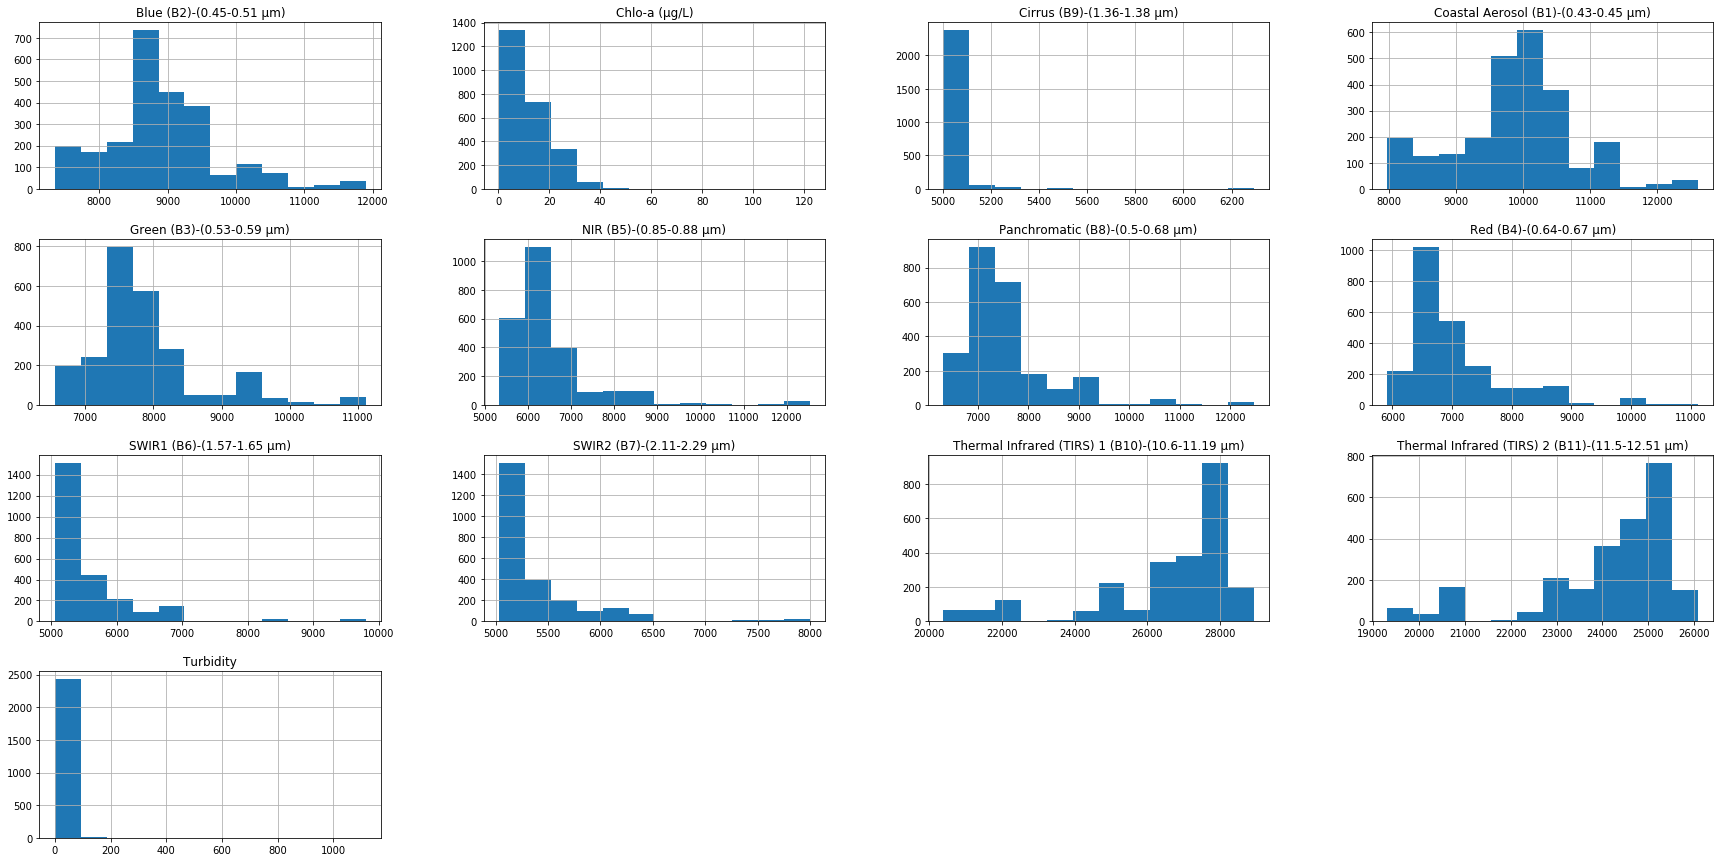

In [10]:
dc.hist(figsize = (30,15), bins = 12)

In [11]:
dc.describe()

,Chlo-a (µg/L),Turbidity,Coastal Aerosol (B1)-(0.43-0.45 µm),Blue (B2)-(0.45-0.51 µm),Green (B3)-(0.53-0.59 µm),Red (B4)-(0.64-0.67 µm),NIR (B5)-(0.85-0.88 µm),SWIR1 (B6)-(1.57-1.65 µm),SWIR2 (B7)-(2.11-2.29 µm),Panchromatic (B8)-(0.5-0.68 µm),Cirrus (B9)-(1.36-1.38 µm),Thermal Infrared (TIRS) 1 (B10)-(10.6-11.19 µm),Thermal Infrared (TIRS) 2 (B11)-(11.5-12.51 µm)
count,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000
mean,12.079708,14.743709,9865.188718,8912.159497,7875.547078,7060.152597,6496.652597,5633.174107,5414.982955,7570.527192,5049.433442,26583.355925,24070.006494
std,8.838352,59.661179,883.004880,818.493601,829.383319,837.312193,1077.566062,684.307831,459.788447,892.225150,87.577510,2000.942856,1519.415110
min,0.300000,0.100000,7973.000000,7355.000000,6558.000000,5915.000000,5332.000000,5059.000000,5033.000000,6311.000000,5003.000000,20383.000000,19312.000000
25%,5.700000,1.900000,9220.000000,8535.000000,7430.000000,6558.000000,5966.000000,5281.000000,5164.000000,7100.000000,5029.000000,26022.000000,23567.500000
50%,9.700000,4.700000,9927.000000,8822.000000,7689.000000,6750.000000,6188.000000,5369.000000,5236.000000,7340.000000,5036.000000,27286.000000,24517.000000
75%,17.000000,11.800000,10409.000000,9330.000000,8125.750000,7237.000000,6739.000000,5770.000000,5472.000000,7813.000000,5047.000000,27977.000000,25067.000000
max,122.200000,1116.500000,12604.000000,11895.000000,11109.000000,11118.000000,12529.000000,9796.000000,7998.000000,12463.000000,6292.000000,28939.000000,26082.000000


In [12]:
dc = dc.where(dc["Chlo-a (µg/L)"] > 0)
dc = dc.where(dc["Coastal Aerosol (B1)-(0.43-0.45 µm)"] < 20000)

In [13]:
dc.describe()

,Chlo-a (µg/L),Turbidity,Coastal Aerosol (B1)-(0.43-0.45 µm),Blue (B2)-(0.45-0.51 µm),Green (B3)-(0.53-0.59 µm),Red (B4)-(0.64-0.67 µm),NIR (B5)-(0.85-0.88 µm),SWIR1 (B6)-(1.57-1.65 µm),SWIR2 (B7)-(2.11-2.29 µm),Panchromatic (B8)-(0.5-0.68 µm),Cirrus (B9)-(1.36-1.38 µm),Thermal Infrared (TIRS) 1 (B10)-(10.6-11.19 µm),Thermal Infrared (TIRS) 2 (B11)-(11.5-12.51 µm)
count,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000
mean,12.079708,14.743709,9865.188718,8912.159497,7875.547078,7060.152597,6496.652597,5633.174107,5414.982955,7570.527192,5049.433442,26583.355925,24070.006494
std,8.838352,59.661179,883.004880,818.493601,829.383319,837.312193,1077.566062,684.307831,459.788447,892.225150,87.577510,2000.942856,1519.415110
min,0.300000,0.100000,7973.000000,7355.000000,6558.000000,5915.000000,5332.000000,5059.000000,5033.000000,6311.000000,5003.000000,20383.000000,19312.000000
25%,5.700000,1.900000,9220.000000,8535.000000,7430.000000,6558.000000,5966.000000,5281.000000,5164.000000,7100.000000,5029.000000,26022.000000,23567.500000
50%,9.700000,4.700000,9927.000000,8822.000000,7689.000000,6750.000000,6188.000000,5369.000000,5236.000000,7340.000000,5036.000000,27286.000000,24517.000000
75%,17.000000,11.800000,10409.000000,9330.000000,8125.750000,7237.000000,6739.000000,5770.000000,5472.000000,7813.000000,5047.000000,27977.000000,25067.000000
max,122.200000,1116.500000,12604.000000,11895.000000,11109.000000,11118.000000,12529.000000,9796.000000,7998.000000,12463.000000,6292.000000,28939.000000,26082.000000


In [14]:
dc = dc.dropna()
dc

,Chlo-a (µg/L),Turbidity,Coastal Aerosol (B1)-(0.43-0.45 µm),Blue (B2)-(0.45-0.51 µm),Green (B3)-(0.53-0.59 µm),Red (B4)-(0.64-0.67 µm),NIR (B5)-(0.85-0.88 µm),SWIR1 (B6)-(1.57-1.65 µm),SWIR2 (B7)-(2.11-2.29 µm),Panchromatic (B8)-(0.5-0.68 µm),Cirrus (B9)-(1.36-1.38 µm),Thermal Infrared (TIRS) 1 (B10)-(10.6-11.19 µm),Thermal Infrared (TIRS) 2 (B11)-(11.5-12.51 µm)
0,6.8,38.6,11162.0,10262.0,9378.0,8676.0,8024.0,6357.0,5886.0,9112.0,5085.0,27131.0,24438.0
1,7.8,40.3,11162.0,10262.0,9378.0,8676.0,8024.0,6357.0,5886.0,9112.0,5085.0,27131.0,24438.0
2,7.0,41.5,11162.0,10262.0,9378.0,8676.0,8024.0,6357.0,5886.0,9112.0,5085.0,27131.0,24438.0
3,6.5,42.4,11162.0,10262.0,9378.0,8676.0,8024.0,6357.0,5886.0,9112.0,5085.0,27131.0,24438.0
4,7.4,42.2,11162.0,10262.0,9378.0,8676.0,8024.0,6357.0,5886.0,9112.0,5085.0,27131.0,24438.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2709,5.9,12.2,11067.0,10250.0,9650.0,8546.0,7118.0,6255.0,5973.0,9192.0,5081.0,25306.0,23204.0
2710,5.5,17.7,11067.0,10250.0,9650.0,8546.0,7118.0,6255.0,5973.0,9192.0,5081.0,25306.0,23204.0
2711,5.5,15.7,11067.0,10250.0,9650.0,8546.0,7118.0,6255.0,5973.0,9192.0,5081.0,25306.0,23204.0
2712,6.0,17.5,11067.0,10250.0,9650.0,8546.0,7118.0,6255.0,5973.0,9192.0,5081.0,25306.0,23204.0


In [15]:
dc["IR"] = (dc["SWIR1 (B6)-(1.57-1.65 µm)"] + dc["SWIR2 (B7)-(2.11-2.29 µm)"])/dc["NIR (B5)-(0.85-0.88 µm)"]
dc.head()

,Chlo-a (µg/L),Turbidity,Coastal Aerosol (B1)-(0.43-0.45 µm),Blue (B2)-(0.45-0.51 µm),Green (B3)-(0.53-0.59 µm),Red (B4)-(0.64-0.67 µm),NIR (B5)-(0.85-0.88 µm),SWIR1 (B6)-(1.57-1.65 µm),SWIR2 (B7)-(2.11-2.29 µm),Panchromatic (B8)-(0.5-0.68 µm),Cirrus (B9)-(1.36-1.38 µm),Thermal Infrared (TIRS) 1 (B10)-(10.6-11.19 µm),Thermal Infrared (TIRS) 2 (B11)-(11.5-12.51 µm),IR
0,6.8,38.6,11162.0,10262.0,9378.0,8676.0,8024.0,6357.0,5886.0,9112.0,5085.0,27131.0,24438.0,1.525798
1,7.8,40.3,11162.0,10262.0,9378.0,8676.0,8024.0,6357.0,5886.0,9112.0,5085.0,27131.0,24438.0,1.525798
2,7.0,41.5,11162.0,10262.0,9378.0,8676.0,8024.0,6357.0,5886.0,9112.0,5085.0,27131.0,24438.0,1.525798
3,6.5,42.4,11162.0,10262.0,9378.0,8676.0,8024.0,6357.0,5886.0,9112.0,5085.0,27131.0,24438.0,1.525798
4,7.4,42.2,11162.0,10262.0,9378.0,8676.0,8024.0,6357.0,5886.0,9112.0,5085.0,27131.0,24438.0,1.525798


In [16]:
corr = dc.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Chlo-a (µg/L),Turbidity,Coastal Aerosol (B1)-(0.43-0.45 µm),Blue (B2)-(0.45-0.51 µm),Green (B3)-(0.53-0.59 µm),Red (B4)-(0.64-0.67 µm),NIR (B5)-(0.85-0.88 µm),SWIR1 (B6)-(1.57-1.65 µm),SWIR2 (B7)-(2.11-2.29 µm),Panchromatic (B8)-(0.5-0.68 µm),Cirrus (B9)-(1.36-1.38 µm),Thermal Infrared (TIRS) 1 (B10)-(10.6-11.19 µm),Thermal Infrared (TIRS) 2 (B11)-(11.5-12.51 µm),IR
Chlo-a (µg/L),1.00,-0.04,0.10,0.02,-0.06,-0.14,-0.08,-0.14,-0.16,-0.10,-0.03,0.36,0.34,-0.09
Turbidity,-0.04,1.00,0.01,0.03,0.06,0.09,0.04,0.03,0.03,0.06,-0.01,-0.05,-0.05,-0.05
Coastal Aerosol (B1)-(0.43-0.45 µm),0.10,0.01,1.00,0.98,0.89,0.76,0.84,0.75,0.73,0.85,0.33,0.55,0.51,-0.87
Blue (B2)-(0.45-0.51 µm),0.02,0.03,0.98,1.00,0.95,0.86,0.90,0.82,0.81,0.92,0.36,0.42,0.37,-0.86
Green (B3)-(0.53-0.59 µm),-0.06,0.06,0.89,0.95,1.00,0.96,0.89,0.86,0.86,0.98,0.29,0.21,0.18,-0.76
Red (B4)-(0.64-0.67 µm),-0.14,0.09,0.76,0.86,0.96,1.00,0.87,0.84,0.86,0.96,0.26,0.03,0.00,-0.70
NIR (B5)-(0.85-0.88 µm),-0.08,0.04,0.84,0.90,0.89,0.87,1.00,0.96,0.94,0.92,0.46,0.20,0.15,-0.83
SWIR1 (B6)-(1.57-1.65 µm),-0.14,0.03,0.75,0.82,0.86,0.84,0.96,1.00,0.99,0.90,0.39,0.11,0.08,-0.64
SWIR2 (B7)-(2.11-2.29 µm),-0.16,0.03,0.73,0.81,0.86,0.86,0.94,0.99,1.00,0.89,0.38,0.09,0.07,-0.60
Panchromatic (B8)-(0.5-0.68 µm),-0.10,0.06,0.85,0.92,0.98,0.96,0.92,0.90,0.89,1.00,0.31,0.12,0.09,-0.75


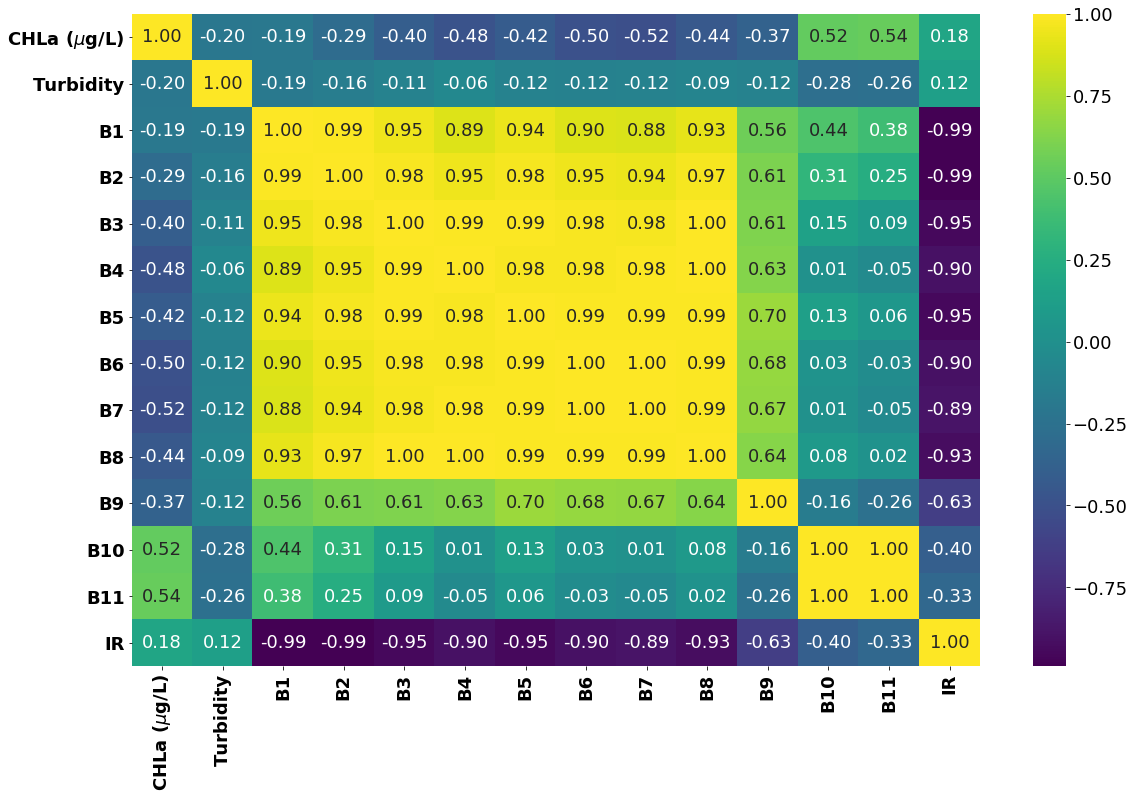

In [17]:
df = corr
fig, ax = plt.subplots(figsize = (19,12))
sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.2f', 
            cmap=plt.get_cmap('viridis'), cbar=True, ax=ax, annot_kws={"size": 18})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)
ax.set_xticklabels(["CHLa ($\mu$g/L)", "Turbidity", "B1", "B2", "B3", "B4", "B5", "B6", "B7", "B8", "B9", "B10", "B11", "IR"], rotation="vertical", fontweight = 'bold', fontsize = 18)
ax.set_yticklabels(["CHLa ($\mu$g/L)", "Turbidity", "B1", "B2", "B3", "B4", "B5", "B6", "B7", "B8", "B9", "B10", "B11", "IR"], rotation="horizontal", fontweight = 'bold', fontsize = 18)
plt.show()
#plt.savefig('figure5.tif', bbox_inches='tight', pad_inches=0.0)

In [18]:
#drop the columns of the dependent variables to have independent variables
X = dc.drop(columns = ["Chlo-a (µg/L)", "Turbidity", "Panchromatic (B8)-(0.5-0.68 µm)", "SWIR2 (B7)-(2.11-2.29 µm)", "Coastal Aerosol (B1)-(0.43-0.45 µm)"])
y = dc[["Chlo-a (µg/L)"]]
Y = dc[["Turbidity"]]

In [19]:
corr1 = X.corr()
corr1.style.background_gradient(cmap='coolwarm').set_precision(2)

,Blue (B2)-(0.45-0.51 µm),Green (B3)-(0.53-0.59 µm),Red (B4)-(0.64-0.67 µm),NIR (B5)-(0.85-0.88 µm),SWIR1 (B6)-(1.57-1.65 µm),Cirrus (B9)-(1.36-1.38 µm),Thermal Infrared (TIRS) 1 (B10)-(10.6-11.19 µm),Thermal Infrared (TIRS) 2 (B11)-(11.5-12.51 µm),IR
Blue (B2)-(0.45-0.51 µm),1.00,0.95,0.86,0.90,0.82,0.36,0.42,0.37,-0.86
Green (B3)-(0.53-0.59 µm),0.95,1.00,0.96,0.89,0.86,0.29,0.21,0.18,-0.76
Red (B4)-(0.64-0.67 µm),0.86,0.96,1.00,0.87,0.84,0.26,0.03,0.00,-0.70
NIR (B5)-(0.85-0.88 µm),0.90,0.89,0.87,1.00,0.96,0.46,0.20,0.15,-0.83
SWIR1 (B6)-(1.57-1.65 µm),0.82,0.86,0.84,0.96,1.00,0.39,0.11,0.08,-0.64
Cirrus (B9)-(1.36-1.38 µm),0.36,0.29,0.26,0.46,0.39,1.00,-0.04,-0.15,-0.39
Thermal Infrared (TIRS) 1 (B10)-(10.6-11.19 µm),0.42,0.21,0.03,0.20,0.11,-0.04,1.00,0.99,-0.42
Thermal Infrared (TIRS) 2 (B11)-(11.5-12.51 µm),0.37,0.18,0.00,0.15,0.08,-0.15,0.99,1.00,-0.35
IR,-0.86,-0.76,-0.70,-0.83,-0.64,-0.39,-0.42,-0.35,1.00


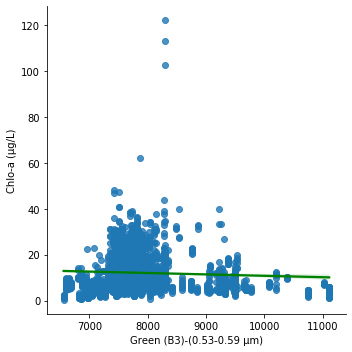

In [20]:
#Linear plot between green and chlorophyll
sns.lmplot(x="Green (B3)-(0.53-0.59 µm)", y="Chlo-a (µg/L)", data=dc, line_kws={'color': 'green'})
plt.xlabel("Green (B3)-(0.53-0.59 µm)")
plt.ylabel("Chlo-a (µg/L)")
plt.show()

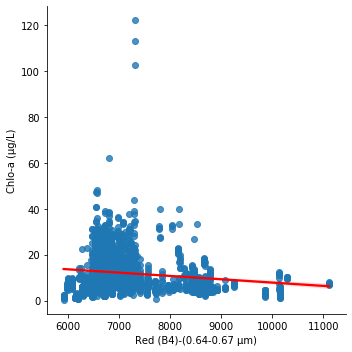

In [21]:
#Linear plot between green and chlorophyll
sns.lmplot(x="Red (B4)-(0.64-0.67 µm)", y="Chlo-a (µg/L)", data=dc, line_kws={'color': 'red'})
plt.xlabel("Red (B4)-(0.64-0.67 µm)")
plt.ylabel("Chlo-a (µg/L)")
plt.show()

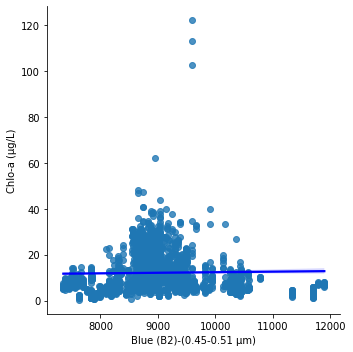

In [22]:
#Linear plot between green and chlorophyll
sns.lmplot(x="Blue (B2)-(0.45-0.51 µm)", y="Chlo-a (µg/L)", data=dc, line_kws={'color': 'blue'})
plt.xlabel("Blue (B2)-(0.45-0.51 µm)")
plt.ylabel("Chlo-a (µg/L)")
plt.show()

In [23]:
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2464 entries, 0 to 2713
Data columns (total 9 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Blue (B2)-(0.45-0.51 µm)                         2464 non-null   float64
 1   Green (B3)-(0.53-0.59 µm)                        2464 non-null   float64
 2   Red (B4)-(0.64-0.67 µm)                          2464 non-null   float64
 3   NIR (B5)-(0.85-0.88 µm)                          2464 non-null   float64
 4   SWIR1 (B6)-(1.57-1.65 µm)                        2464 non-null   float64
 5   Cirrus (B9)-(1.36-1.38 µm)                       2464 non-null   float64
 6   Thermal Infrared (TIRS) 1 (B10)-(10.6-11.19 µm)  2464 non-null   float64
 7   Thermal Infrared (TIRS) 2 (B11)-(11.5-12.51 µm)  2464 non-null   float64
 8   IR                                               2464 non-null   float64
dtypes: float64(9)
memory usage: 192

In [25]:
y.info()
Y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2464 entries, 0 to 2713
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Chlo-a (µg/L)  2464 non-null   float64
dtypes: float64(1)
memory usage: 38.5 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2464 entries, 0 to 2713
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Turbidity  2464 non-null   float64
dtypes: float64(1)
memory usage: 38.5 KB


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1724 entries, 502 to 883
Data columns (total 9 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Blue (B2)-(0.45-0.51 µm)                         1724 non-null   float64
 1   Green (B3)-(0.53-0.59 µm)                        1724 non-null   float64
 2   Red (B4)-(0.64-0.67 µm)                          1724 non-null   float64
 3   NIR (B5)-(0.85-0.88 µm)                          1724 non-null   float64
 4   SWIR1 (B6)-(1.57-1.65 µm)                        1724 non-null   float64
 5   Cirrus (B9)-(1.36-1.38 µm)                       1724 non-null   float64
 6   Thermal Infrared (TIRS) 1 (B10)-(10.6-11.19 µm)  1724 non-null   float64
 7   Thermal Infrared (TIRS) 2 (B11)-(11.5-12.51 µm)  1724 non-null   float64
 8   IR                                               1724 non-null   float64
dtypes: float64(9)
memory usage: 13

In [28]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1724 entries, 502 to 883
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Chlo-a (µg/L)  1724 non-null   float64
dtypes: float64(1)
memory usage: 26.9 KB


In [29]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 111 to 1403
Data columns (total 9 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Blue (B2)-(0.45-0.51 µm)                         740 non-null    float64
 1   Green (B3)-(0.53-0.59 µm)                        740 non-null    float64
 2   Red (B4)-(0.64-0.67 µm)                          740 non-null    float64
 3   NIR (B5)-(0.85-0.88 µm)                          740 non-null    float64
 4   SWIR1 (B6)-(1.57-1.65 µm)                        740 non-null    float64
 5   Cirrus (B9)-(1.36-1.38 µm)                       740 non-null    float64
 6   Thermal Infrared (TIRS) 1 (B10)-(10.6-11.19 µm)  740 non-null    float64
 7   Thermal Infrared (TIRS) 2 (B11)-(11.5-12.51 µm)  740 non-null    float64
 8   IR                                               740 non-null    float64
dtypes: float64(9)
memory usage: 57

In [30]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 111 to 1403
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Chlo-a (µg/L)  740 non-null    float64
dtypes: float64(1)
memory usage: 11.6 KB


In [31]:
#calling the model and fitting the data points
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
y_pred = lm.predict(X_test)

In [33]:
#To retrieve the intercept:
print(lm.intercept_)
#For retrieving the slope:
print(lm.coef_)

[12.11326051]
[[ -8.1121763    9.92743107  -3.58093835  -8.31266855   4.18871553
   -0.08014276  16.47417868 -12.51797012  -4.29451382]]


In [34]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.839257337121196
Mean Squared Error: 74.1770964184807
Root Mean Squared Error: 8.61261263604028


In [35]:
y_pred_train = lm.predict(X_train)

In [36]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

Mean Absolute Error: 5.6255640030044125
Mean Squared Error: 56.92560915214213
Root Mean Squared Error: 7.544906172520777


In [37]:
y_test = np.array(y_test)
y_pred = np.array(y_pred)

In [38]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,3.1,9.005342
1,2.9,11.725898
2,2.5,15.756543
3,12.6,8.420329
4,1.8,8.366287
...,...,...
735,35.9,12.140630
736,11.1,11.078838
737,10.5,15.119913
738,8.3,10.709854


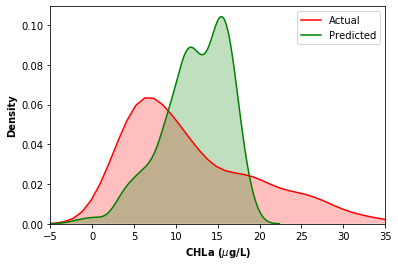

In [53]:
ax = sns.kdeplot(df["Actual"], shade=True, color="r")
ay = sns.kdeplot(df["Predicted"], shade=True, color="g")
ax.set_xlim(-5,35)
ax.set_xlabel("CHLa ($\mu$g/L)", fontweight = 'bold')
ax.set_ylabel("Density", fontweight = 'bold')
plt.savefig("figure6.tif", dpi = 300)

In [40]:
cls = RandomForestRegressor(criterion='mse')   

cls.fit(X_train, y_train)#We are training the model with RBF'ed data

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [41]:
rf_pred = cls.predict(X_test)
rf_pred

array([ 5.20044217,  3.71490669,  4.41508874,  7.25668233,  1.87718037,
        8.40005731,  6.67500752, 12.90121568, 20.24495682, 10.66124119,
        5.37214329, 20.61552381,  9.50631876, 16.10729254,  6.36569694,
       29.74959844,  8.17352587, 16.33978712, 18.18836505,  4.82705119,
       14.42114966, 13.38745921,  7.69451042,  9.55007879,  9.55007879,
       16.33978712, 25.3672449 , 15.73296178, 17.84465667,  7.66876839,
       14.32216548,  7.0818631 ,  6.57013586,  7.0818631 ,  4.6496906 ,
        6.36569694,  4.63080837, 16.66082603, 14.14855659, 15.04667499,
        5.20044217, 16.33978712, 19.74092024, 23.42933636,  1.63686748,
        8.54854679,  9.23854994,  9.76323095,  2.43128294, 19.24993742,
        9.73403452, 10.15123452, 21.77544426, 20.24495682, 14.42114966,
       28.80331474, 19.24993742,  6.3190511 ,  4.86805096, 28.30655675,
        5.01418374, 24.8822237 , 18.10913413,  7.76755271, 13.95422588,
        5.87806499,  6.43466611, 13.08409318, 13.38745921,  8.87

In [42]:
mse = metrics.mean_squared_error(y_test, rf_pred)
mse

47.873271257997565

In [43]:
rf_pred_test = cls.predict(X_train)
rf_pred_test

array([ 6.45426663, 14.14855659,  8.17352587, ..., 25.71138239,
       28.30655675,  1.87718037])

In [44]:
mse = metrics.mean_squared_error(y_train, rf_pred_test)
mse

26.769816852399302

In [45]:
#create a max_depth parameter
max_depth =  [7,8,9,10,11]
max_features = [7,8,9,10,11]
min_samples_split = [2,4,5,10]
min_samples_leaf = [1,5,10,15]

#create a random grid for random search
random_grid = {'max_depth' : max_depth,
'max_features': max_features,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf}

rf = RandomForestRegressor(n_estimators = 300, random_state = 42)
random_search = RandomizedSearchCV(rf, param_distributions = random_grid, n_iter = 50, cv = 3)
random_search.fit(X_train, y_train)

RF = random_search.best_estimator_

RF.fit(X_train, y_train)

#predicting a result for test
y_pred = RF.predict(X_test)

#predicting a result for train
y_pred_train = RF.predict(X_train)

In [46]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

47.96064926267196

In [47]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,y_pred_train)

27.405457066070877

In [48]:
clf = SVR()
clf.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [49]:
sv_pred = clf.predict(X_test)
sv_pred

array([ 5.73056703, 11.69797748,  7.48069898,  5.41274419,  1.82789421,
        7.17487912,  6.7259168 , 11.02508154, 16.17302458,  8.9340716 ,
       14.65020881, 10.97165636, 10.70785734, 15.29988303, 15.96809193,
       16.18965698,  7.87426306, 15.79981198, 16.68309069,  6.74180982,
       15.46198051, 15.11159293,  9.09390463, 10.19992506, 10.19992506,
       15.79981198, 17.46805261, 12.67860836, 12.6878293 , 11.81702324,
       10.79991242,  7.41960691,  7.24973383,  7.41960691,  4.0455877 ,
       15.96809193,  6.91752716, 10.32529715, 16.43453442, 15.47131682,
        5.73056703, 15.79981198, 13.08806572, 17.1936633 ,  1.40026661,
        8.63891586, 15.81097583, 10.74881376,  2.90051211, 17.54873418,
        8.53497598, 11.58017529, 15.89000887, 16.17302458, 15.46198051,
       13.85770928, 17.54873418,  8.0321683 , 10.48410818, 15.3230022 ,
        5.96846707, 16.2164129 , 11.87640201, 10.21515852, 13.2816926 ,
        5.7863212 ,  6.10541558,  7.69972882, 15.11159293,  7.10

In [50]:
mse = metrics.mean_squared_error(y_test, sv_pred)
mse

69.54385018036324

In [51]:
sv_pred_train = clf.predict(X_train)
sv_pred_train

array([15.13795196, 16.43453442,  7.87426306, ..., 16.7495489 ,
       15.3230022 ,  1.82789421])

In [52]:
mse = metrics.mean_squared_error(y_train, sv_pred_train)
mse

49.799902194713134